# Validation 1GnB - DEJMPS purification policy

In [15]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

In [16]:
purif_policy = main.policy_DEJMPS

---
---
## Convergence increasing simulation time

In [30]:
n = 2

# GEN
p_gen = 1
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 1
pur_after_swap = False

# NOISE
Gamma = 1/5

# CONS
p_cons = 0.1

# Numerical
t_end_vec = [int(10**i) for i in np.linspace(1,5,50)]
randomseed = 2

In [31]:
#------------------------------------
# Calculations
#------------------------------------
imp.reload(main)

Fcons_avg_vec = []
Fcons_stderr_vec = []
A_avg_vec = []
A_stderr_vec = []

for t_end in tqdmn(t_end_vec, leave=False):
    Fcons_avg, Fcons_stderr, A_avg, A_stderr, _, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
    Fcons_avg_vec += [Fcons_avg]
    Fcons_stderr_vec += [Fcons_stderr]
    A_avg_vec += [A_avg]
    A_stderr_vec += [A_stderr]

A_theory, Fcons_theory = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif, purif_policy, pur_after_swap, Gamma, p_cons)

  0%|          | 0/50 [00:00<?, ?it/s]

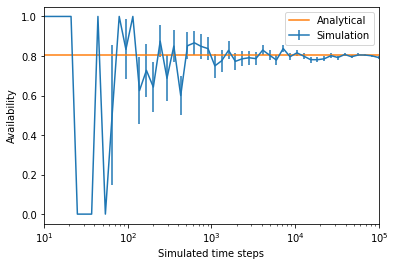

In [32]:
#------------------------------------
# Plot
#------------------------------------
x = t_end_vec
y = A_avg_vec
yerr = A_stderr_vec
x_theory = [t_end_vec[0], t_end_vec[-1]]
y_theory = [A_theory, A_theory]
xlabel = 'Simulated time steps'
ylabel = 'Availability'


fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=yerr, label=r'Simulation')
plt.plot(x_theory, y_theory, label=r'Analytical')

plt.xscale('log')
plt.xlim([x[0], x[-1]])
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

plt.show()

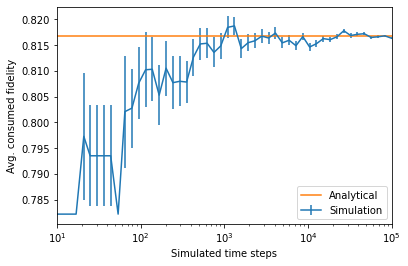

In [6]:
#------------------------------------
# Plot
#------------------------------------
x = t_end_vec
y = Fcons_avg_vec
yerr = Fcons_stderr_vec
x_theory = [t_end_vec[0], t_end_vec[-1]]
y_theory = [Fcons_theory, Fcons_theory]
xlabel = 'Simulated time steps'
ylabel = 'Avg. consumed fidelity'


fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=yerr, label=r'Simulation')
plt.plot(x_theory, y_theory, label=r'Analytical')

plt.xscale('log')
plt.xlim([x[0], x[-1]])
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

plt.show()

---
---
## Validation varying $p_\mathrm{cons}$

In [7]:
n = 2

# GEN
p_gen = 1
F_new = 1
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 1
pur_after_swap = False

# NOISE
Gamma = 1

# CONS
p_cons_vec = np.linspace(0.001,1,50)

# Numerical
t_end = int(1e5)
randomseed = 2

In [8]:
#------------------------------------
# Calculations
#------------------------------------
imp.reload(main)

Fcons_avg_vec = []
Fcons_stderr_vec = []
A_avg_vec = []
A_stderr_vec = []
A_theory_vec = []
Fcons_theory_vec = []

for p_cons in tqdmn(p_cons_vec, leave=False):
    Fcons_avg, Fcons_stderr, A_avg, A_stderr, _, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
    Fcons_avg_vec += [Fcons_avg]
    Fcons_stderr_vec += [Fcons_stderr]
    A_avg_vec += [A_avg]
    A_stderr_vec += [A_stderr]

    # Theory
    A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif, purif_policy, pur_after_swap, Gamma, p_cons)
    A_theory_vec += [A]
    Fcons_theory_vec += [Fcons]

  0%|          | 0/50 [00:00<?, ?it/s]

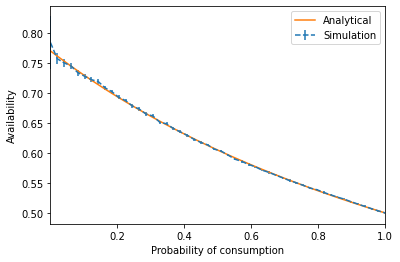

In [9]:
#------------------------------------
# Plot
#------------------------------------
x = p_cons_vec
y = A_avg_vec
yerr = A_stderr_vec
x_theory = p_cons_vec
y_theory = A_theory_vec
xlabel = r'Probability of consumption'
ylabel = r'Availability'


fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=yerr, linestyle='--', label=r'Simulation')
plt.plot(x_theory, y_theory, label=r'Analytical')

plt.xlim([x[0], x[-1]])
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

plt.show()

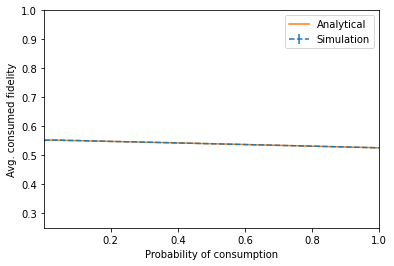

In [10]:
#------------------------------------
# Plot
#------------------------------------
x = p_cons_vec
y = Fcons_avg_vec
yerr = Fcons_stderr_vec
x_theory = p_cons_vec
y_theory = Fcons_theory_vec
xlabel = r'Probability of consumption'
ylabel = r'Avg. consumed fidelity'


fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=yerr, linestyle='--', label=r'Simulation')
plt.plot(x_theory, y_theory, label=r'Analytical')

plt.xlim([x[0], x[-1]])
plt.ylim([0.25,1])
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

plt.show()

---
### CONCLUSIONS:
#### Availability:
 1. Seems to agree.
 
#### Fidelity:
 1. Seems to agree.
---

---
---
## Validation varying $\Gamma$

In [11]:
n = 2

# GEN
p_gen = 1
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 1
pur_after_swap = False

# NOISE
Gamma_vec = np.linspace(0,2,20)

# CONS
p_cons = 0.2

# Numerical
t_end = int(1e5)
randomseed = 2

In [12]:
#------------------------------------
# Calculations
#------------------------------------
imp.reload(main)

Fcons_avg_vec = []
Fcons_stderr_vec = []
A_avg_vec = []
A_stderr_vec = []
A_theory_vec = []
Fcons_theory_vec = []

for Gamma in tqdmn(Gamma_vec, leave=False):
    Fcons_avg, Fcons_stderr, A_avg, A_stderr, _, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
    Fcons_avg_vec += [Fcons_avg]
    Fcons_stderr_vec += [Fcons_stderr]
    A_avg_vec += [A_avg]
    A_stderr_vec += [A_stderr]

    # Theory
    A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif, purif_policy, pur_after_swap, Gamma, p_cons)
    A_theory_vec += [A]
    Fcons_theory_vec += [Fcons]

  0%|          | 0/20 [00:00<?, ?it/s]

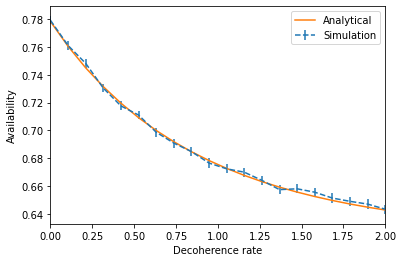

In [13]:
#------------------------------------
# Plot
#------------------------------------
x = Gamma_vec
y = A_avg_vec
yerr = A_stderr_vec
x_theory = Gamma_vec
y_theory = A_theory_vec
xlabel = r'Decoherence rate'
ylabel = r'Availability'


fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=yerr, linestyle='--', label=r'Simulation')
plt.plot(x_theory, y_theory, label=r'Analytical')

plt.xlim([x[0], x[-1]])
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

plt.show()

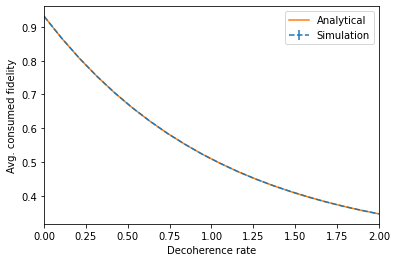

In [14]:
#------------------------------------
# Plot
#------------------------------------
x = Gamma_vec
y = Fcons_avg_vec
yerr = Fcons_stderr_vec
x_theory = Gamma_vec
y_theory = Fcons_theory_vec
xlabel = r'Decoherence rate'
ylabel = r'Avg. consumed fidelity'


fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=yerr, linestyle='--', label=r'Simulation')
plt.plot(x_theory, y_theory, label=r'Analytical')

plt.xlim([x[0], x[-1]])
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

plt.show()

---
### CONCLUSIONS:
#### Availability:
 1. Seems to agree.
 
#### Fidelity:
 1. Seems to agree.
---

---
---
## Validation varying $q$

In [23]:
n = 2

# GEN
p_gen = 1
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0,1,20)
pur_after_swap = False

# NOISE
Gamma = 1/5

# CONS
p_cons = 0.2

# Numerical
t_end = int(1e6)
randomseed = 2

In [24]:
#------------------------------------
# Calculations
#------------------------------------
imp.reload(main)

Fcons_avg_vec = []
Fcons_stderr_vec = []
A_avg_vec = []
A_stderr_vec = []
A_theory_vec = []
Fcons_theory_vec = []

for q_purif in tqdmn(q_purif_vec, leave=False):
    Fcons_avg, Fcons_stderr, A_avg, A_stderr, _, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
    Fcons_avg_vec += [Fcons_avg]
    Fcons_stderr_vec += [Fcons_stderr]
    A_avg_vec += [A_avg]
    A_stderr_vec += [A_stderr]

    # Theory
    A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif, purif_policy, pur_after_swap, Gamma, p_cons)
    A_theory_vec += [A]
    Fcons_theory_vec += [Fcons]

  0%|          | 0/20 [00:00<?, ?it/s]

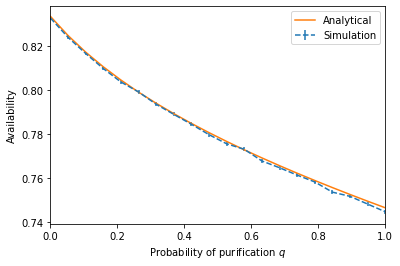

In [25]:
#------------------------------------
# Plot
#------------------------------------
x = q_purif_vec
y = A_avg_vec
yerr = A_stderr_vec
x_theory = q_purif_vec
y_theory = A_theory_vec
xlabel = r'Probability of purification $q$'
ylabel = r'Availability'


fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=yerr, linestyle='--', label=r'Simulation')
plt.plot(x_theory, y_theory, label=r'Analytical')

plt.xlim([x[0], x[-1]])
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

plt.show()

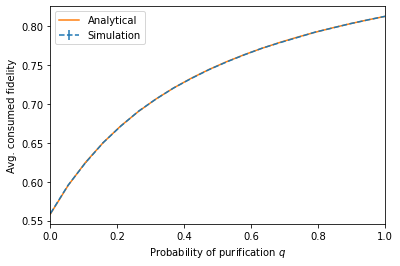

In [26]:
#------------------------------------
# Plot
#------------------------------------
x = q_purif_vec
y = Fcons_avg_vec
yerr = Fcons_stderr_vec
x_theory = q_purif_vec
y_theory = Fcons_theory_vec
xlabel = r'Probability of purification $q$'
ylabel = r'Avg. consumed fidelity'


fig, ax = plt.subplots()
plt.errorbar(x, y, yerr=yerr, linestyle='--', label=r'Simulation')
plt.plot(x_theory, y_theory, label=r'Analytical')

plt.xlim([x[0], x[-1]])
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

plt.show()

---
### CONCLUSIONS:
#### Availability:
 1. Seems to agree.
 
#### Fidelity:
 1. Seems to agree.
---